USER BEHAVIOR DATASET

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


In [2]:
df=pd.read_csv('user_behavior_dataset.csv')
df.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


In [3]:
df.columns

Index(['User ID', 'Device Model', 'Operating System',
       'App Usage Time (min/day)', 'Screen On Time (hours/day)',
       'Battery Drain (mAh/day)', 'Number of Apps Installed',
       'Data Usage (MB/day)', 'Age', 'Gender', 'User Behavior Class'],
      dtype='object')

In [4]:
df.shape

(700, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB


DATA VISUALIZATION

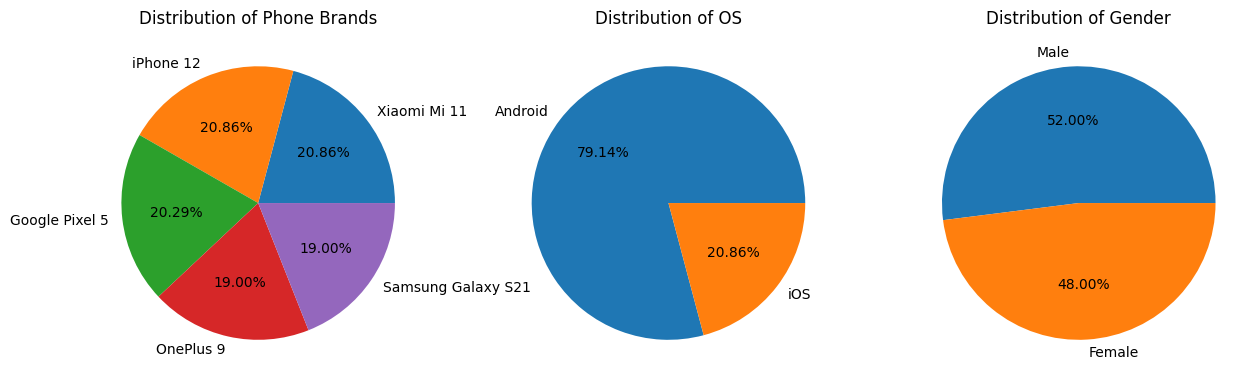

In [6]:



tdf1=df['Device Model'].value_counts().reset_index()
tdf2=df['Operating System'].value_counts().reset_index()
tdf3=df['Gender'].value_counts().reset_index()
fig,ax=plt.subplots(1,3,figsize=(15,6))
ax[0].pie(x=tdf1['count'],labels=tdf1['Device Model'],autopct='%.2f%%') # type: ignore
ax[0].set_title("Distribution of Phone Brands") # type: ignore
ax[1].pie(x=tdf2['count'],labels=tdf2['Operating System'],autopct='%.2f%%')
ax[1].set_title("Distribution of OS")
ax[2].pie(x=tdf3['count'],labels=tdf3['Gender'],autopct='%.2f%%')
ax[2].set_title("Distribution of Gender")
plt.show()


In [7]:
bins = [ 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65]

# Create age groups
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=[ "15-19", "20-24", "25-29", "30-34", "35-39", "40-44", "45-49", "50-54", "55-59", "60-64", ])
df.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class,Age Group
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4,35-39
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3,45-49
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2,40-44
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3,15-19
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3,30-34


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   User ID                     700 non-null    int64   
 1   Device Model                700 non-null    object  
 2   Operating System            700 non-null    object  
 3   App Usage Time (min/day)    700 non-null    int64   
 4   Screen On Time (hours/day)  700 non-null    float64 
 5   Battery Drain (mAh/day)     700 non-null    int64   
 6   Number of Apps Installed    700 non-null    int64   
 7   Data Usage (MB/day)         700 non-null    int64   
 8   Age                         700 non-null    int64   
 9   Gender                      700 non-null    object  
 10  User Behavior Class         700 non-null    int64   
 11  Age Group                   700 non-null    category
dtypes: category(1), float64(1), int64(7), object(3)
memory usage: 61.3+ KB


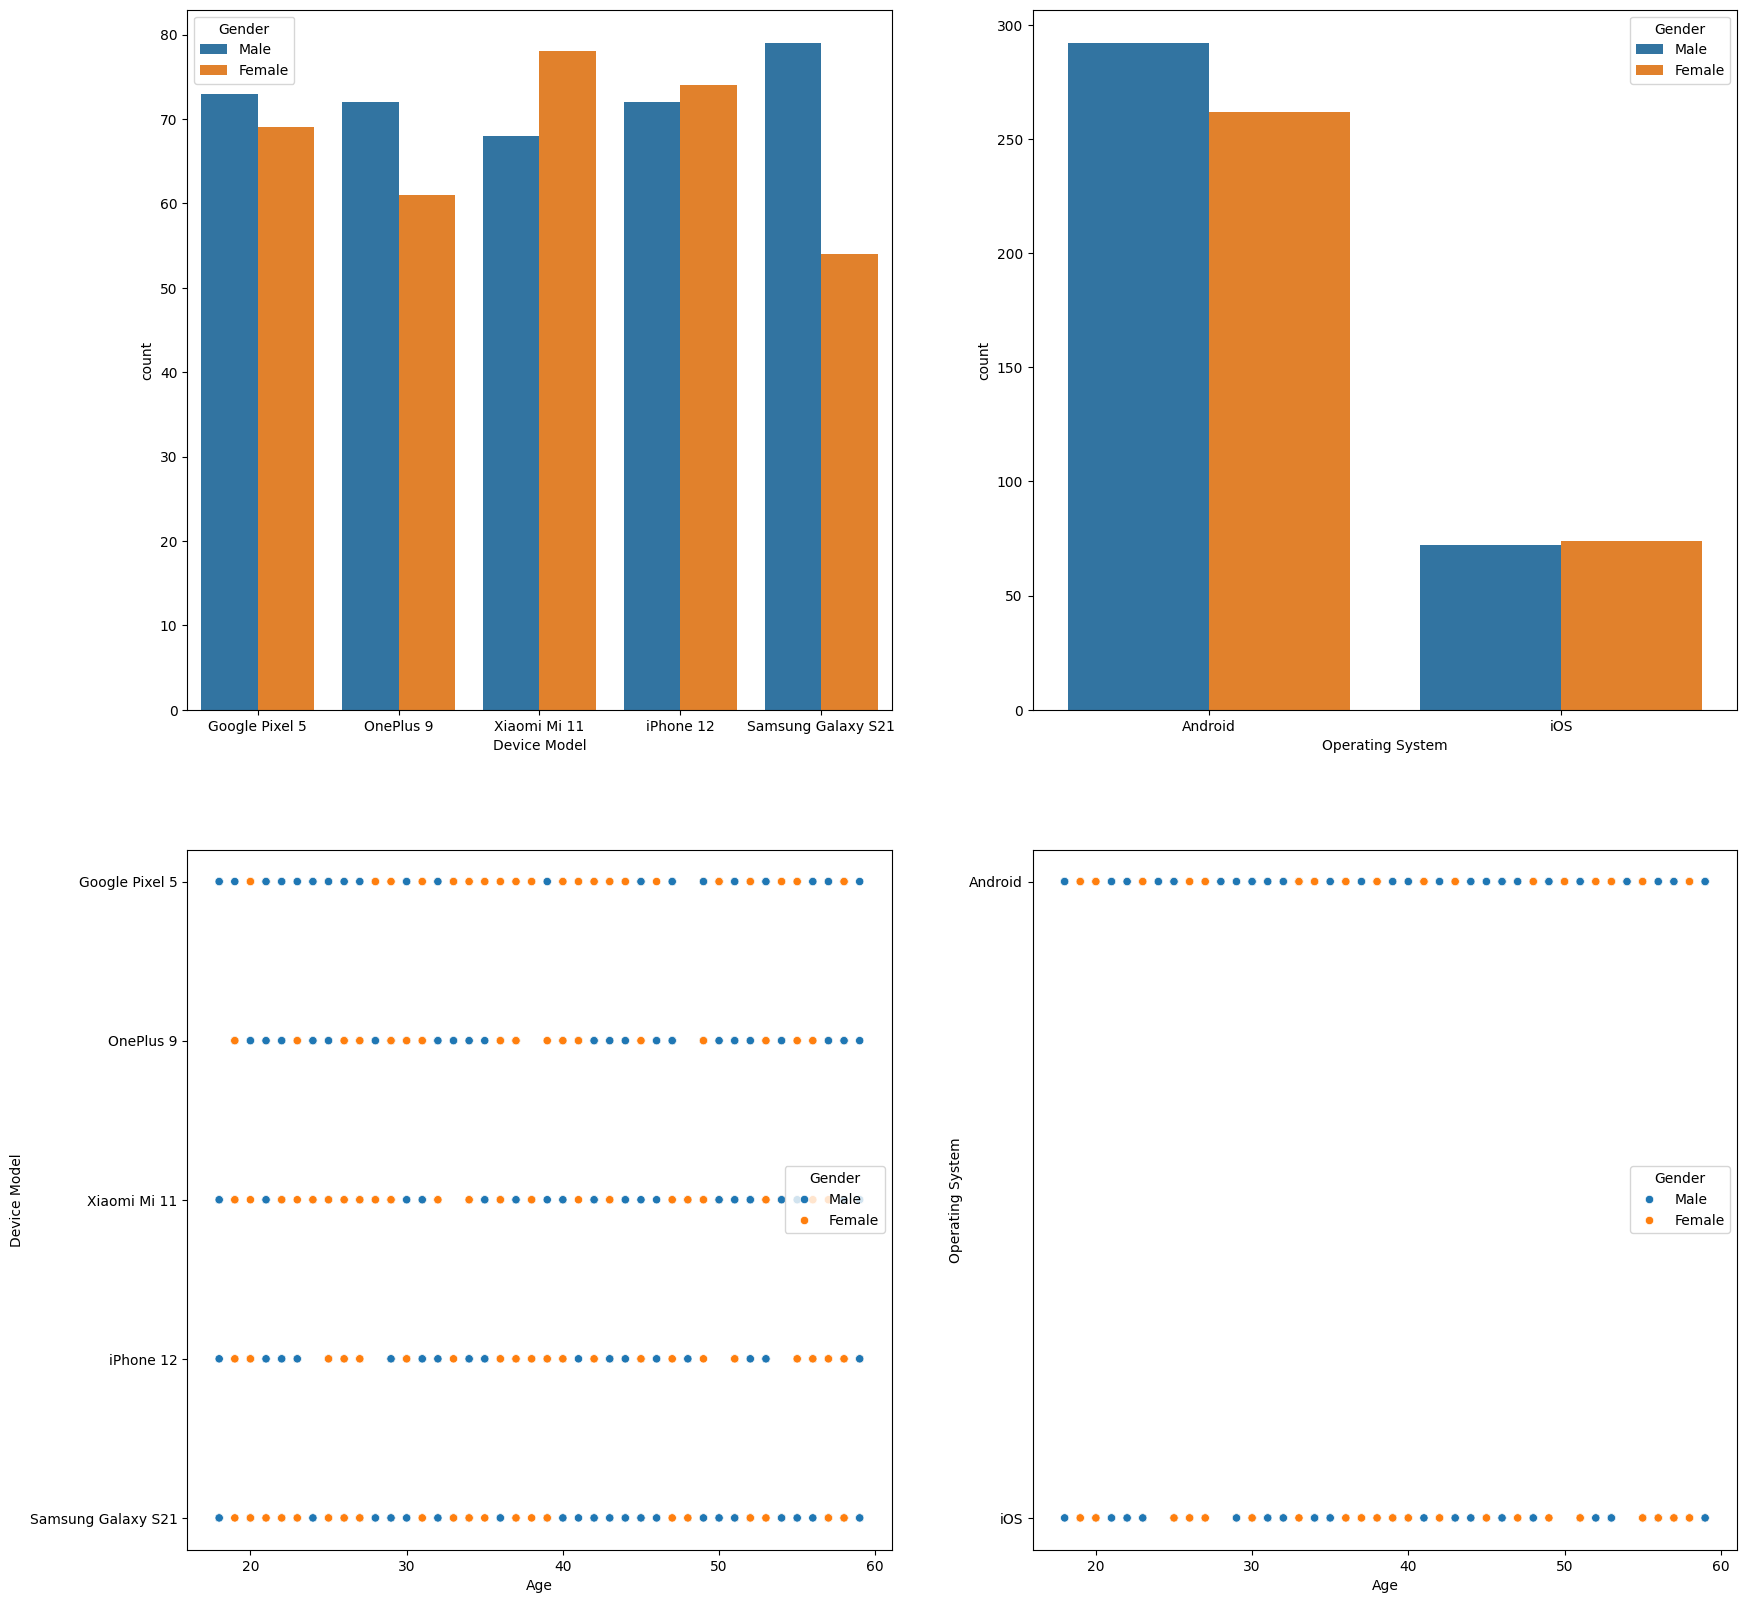

In [9]:
fig,ax=plt.subplots(2,2,figsize=(20,20))
sns.countplot(data=df,x='Device Model',hue='Gender',ax=ax[0,0])
sns.countplot(data=df,x='Operating System',hue='Gender',ax=ax[0,1])
sns.scatterplot(data=df,y='Device Model',x='Age',hue='Gender',ax=ax[1,0])
sns.scatterplot(data=df,y='Operating System',x='Age',hue='Gender',ax=ax[1,1])
plt.show()

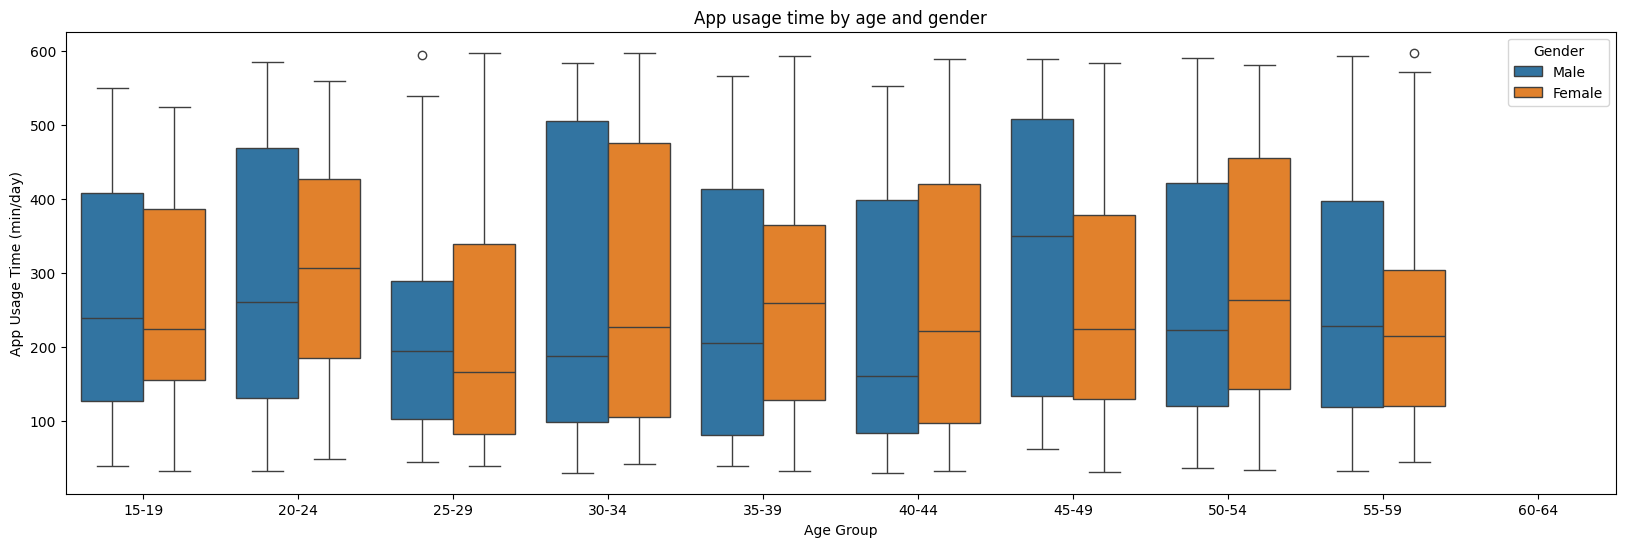

In [10]:
plt.figure(figsize=(20,6))
sns.boxplot(x='Age Group',y='App Usage Time (min/day)',hue='Gender',data=df)
plt.title('App usage time by age and gender')
plt.show()

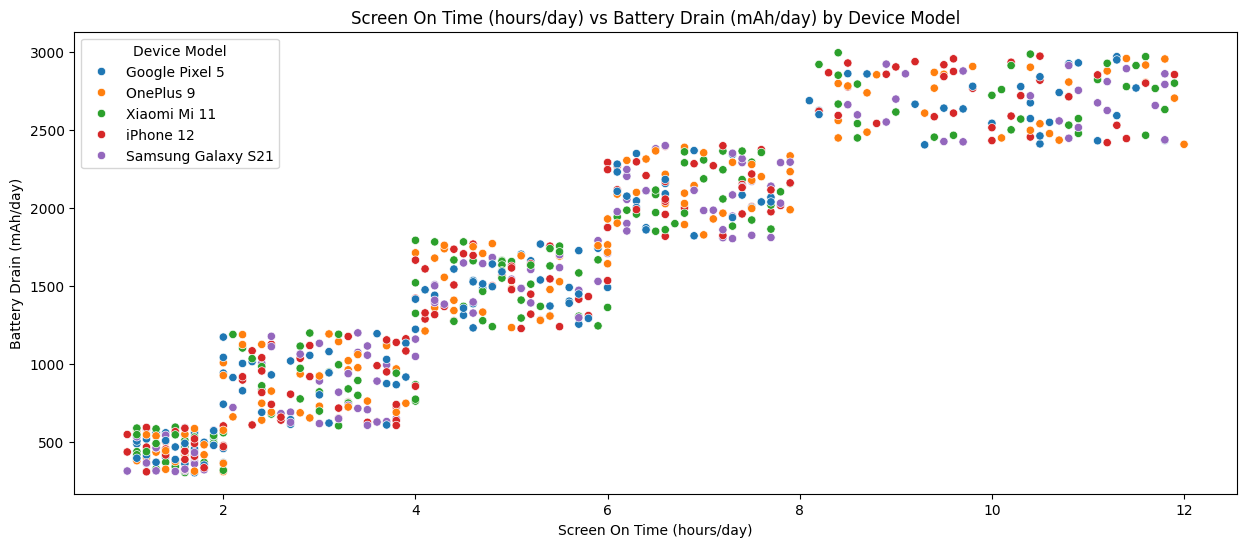

In [11]:
plt.figure(figsize=(15,6))
sns.scatterplot(x=df['Screen On Time (hours/day)'],y=df['Battery Drain (mAh/day)'],hue=df['Device Model'])
plt.title('Screen On Time (hours/day) vs Battery Drain (mAh/day) by Device Model')
plt.show()

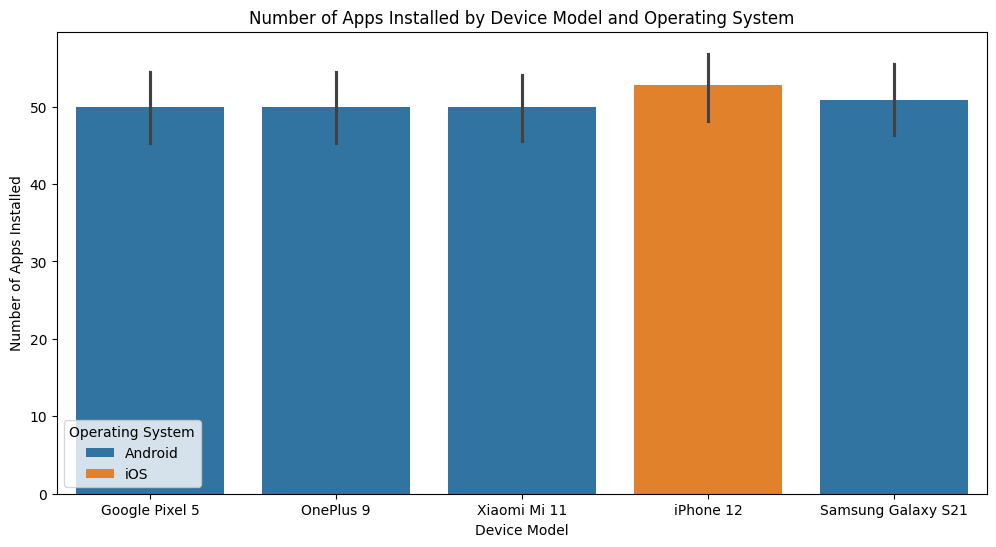

In [12]:
plt.figure(figsize=(12,6))
sns.barplot(x=df['Device Model'],y=df['Number of Apps Installed'],hue=df['Operating System'])
plt.title('Number of Apps Installed by Device Model and Operating System')
plt.show()

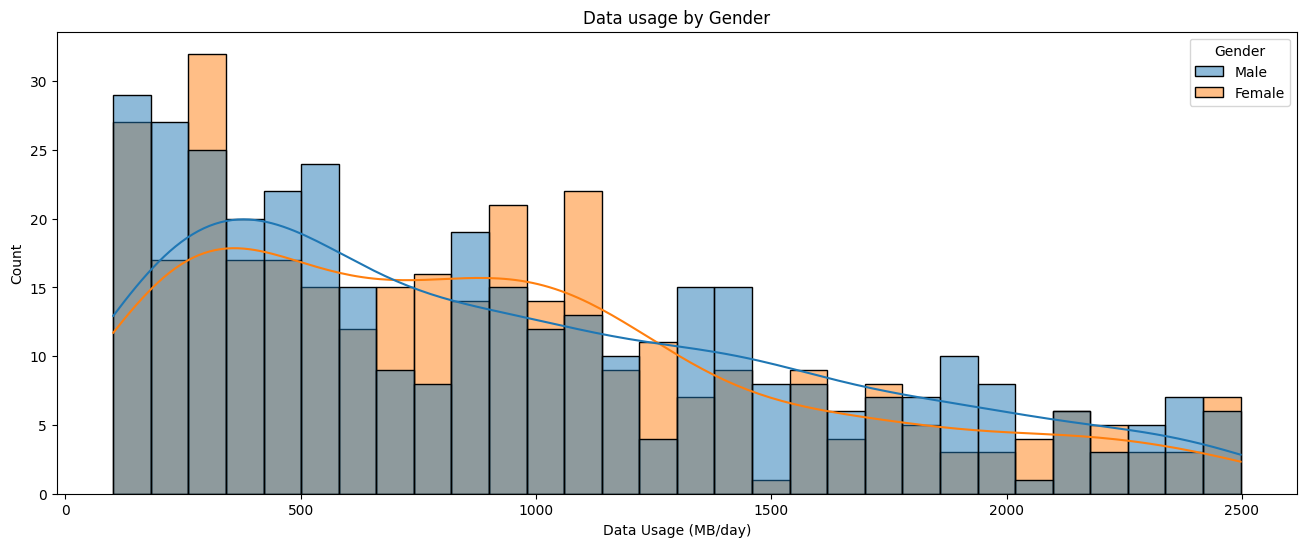

In [13]:
plt.figure(figsize=(16,6))
sns.histplot(x=df['Data Usage (MB/day)'],hue=df['Gender'],bins=30,kde=True)
plt.title('Data usage by Gender')
plt.show()

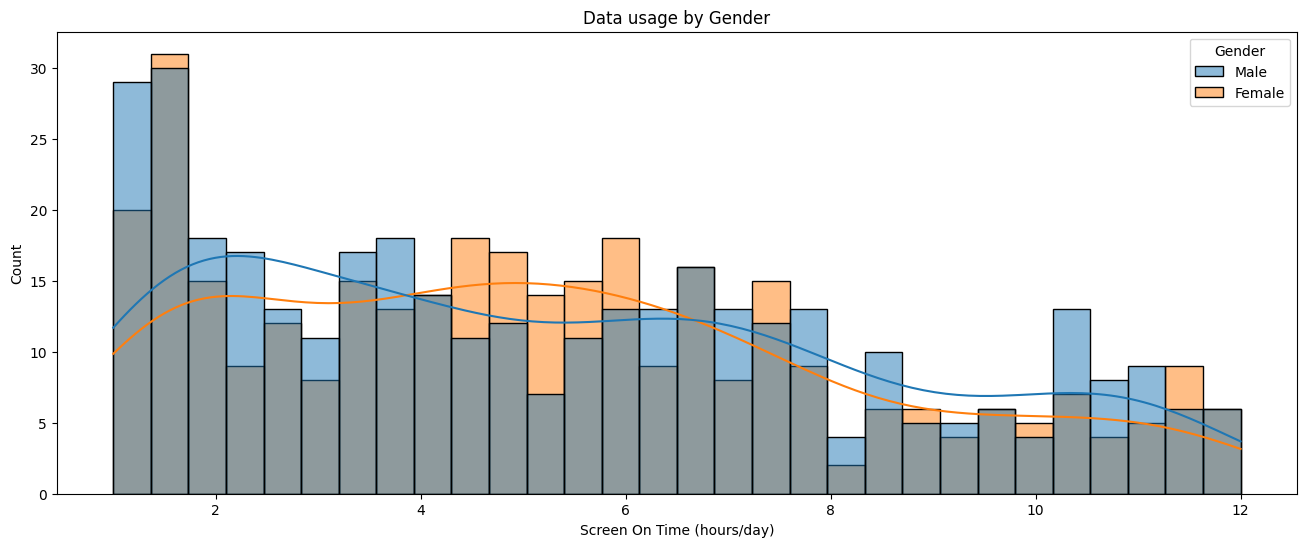

In [14]:
plt.figure(figsize=(16,6))
sns.histplot(x=df['Screen On Time (hours/day)'],hue=df['Gender'],bins=30,kde=True)
plt.title('Data usage by Gender')
plt.show()

In [15]:
df.isnull().any()

User ID                       False
Device Model                  False
Operating System              False
App Usage Time (min/day)      False
Screen On Time (hours/day)    False
Battery Drain (mAh/day)       False
Number of Apps Installed      False
Data Usage (MB/day)           False
Age                           False
Gender                        False
User Behavior Class           False
Age Group                     False
dtype: bool

In [16]:
df.drop(columns=['User ID','Age Group'],inplace=True,axis=1)

In [17]:
for col in df.columns[df.dtypes=='object']:
    print(df[col].value_counts(),'\n')

Device Model
Xiaomi Mi 11          146
iPhone 12             146
Google Pixel 5        142
OnePlus 9             133
Samsung Galaxy S21    133
Name: count, dtype: int64 

Operating System
Android    554
iOS        146
Name: count, dtype: int64 

Gender
Male      364
Female    336
Name: count, dtype: int64 



In [18]:
le=LabelEncoder()
for col in df.columns[df.dtypes=='object']:
    df[col]=le.fit_transform(df[col])

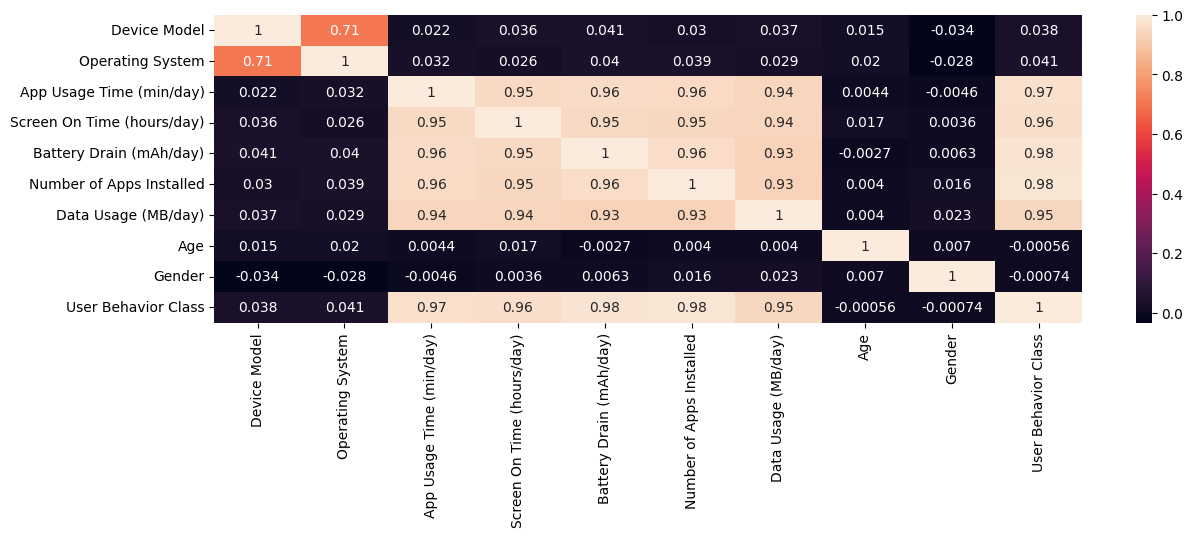

In [19]:
plt.figure(figsize=(14,4))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [20]:
df['Data_consumption_for_app']=df['App Usage Time (min/day)']/df['Data Usage (MB/day)']
df['App_Usage_Prop']=df['App Usage Time (min/day)']/(df['Screen On Time (hours/day)']*60)   


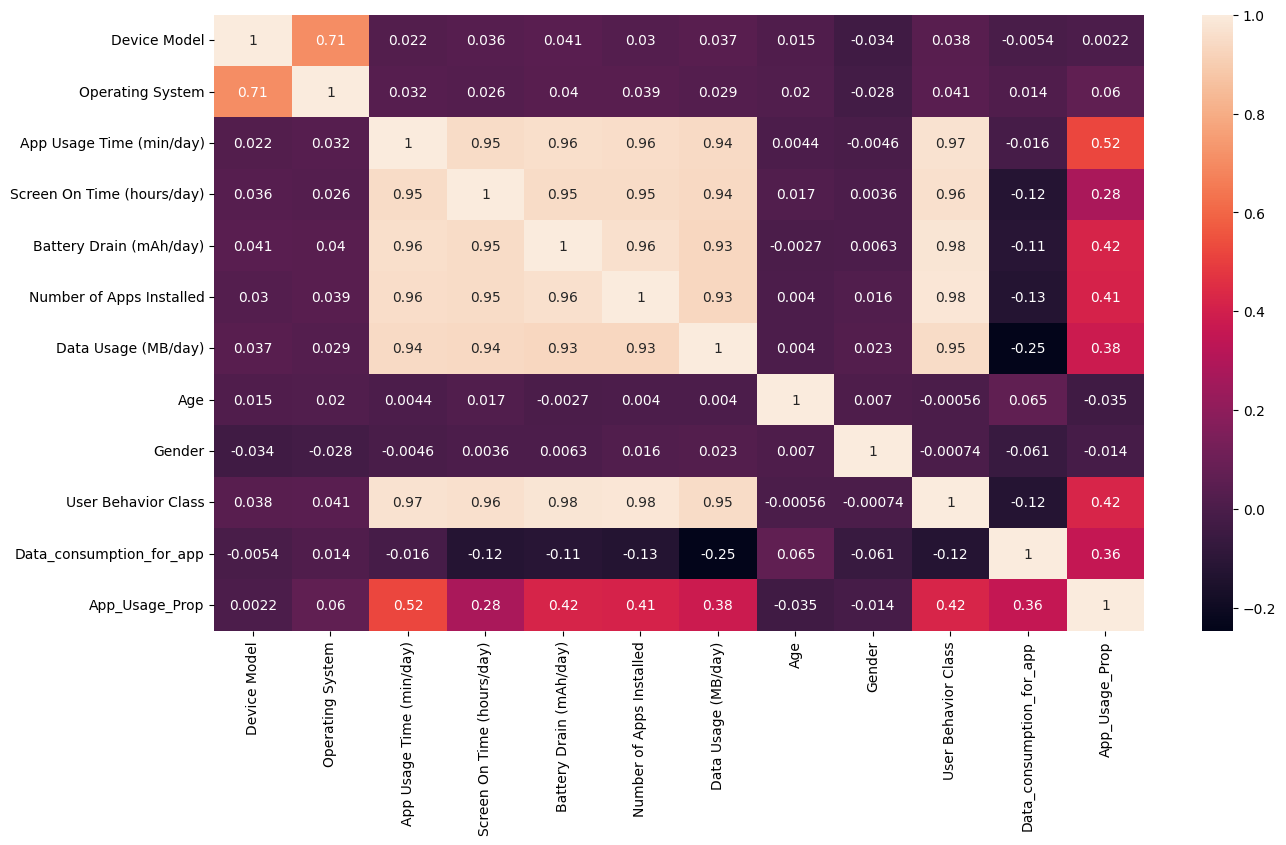

In [21]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True)
plt.show()